In [13]:
#here we try to plot the PBG in 1D photonic crystals
import meep as mp
import numpy as np
import math as m
from meep import mpb 
import matplotlib.pyplot as plt


#Declare the parameters
num_bands = 4
resolution = 64
eps1 = 13
eps2 = 12

a = 0.5

corner= mp.Vector3(0,0,0)
d1 = 0.3/a # thickness of the slab
d2 = 0.2/a # thickness of the slab2
h = 0.5/a # thickness of the slab3


# define the geometry
geometry_lattice = mp.Lattice(size=mp.Vector3(1,1),
                              basis1=mp.Vector3(1,))

In [14]:
k_points = [
           
            mp.Vector3(0,0), # x point
            # mp.Vector3(0.25,0), # y point
            # mp.Vector3(0.5,0), # y point
            # mp.Vector3(0.75,0), # z point
            mp.Vector3(1,0), # M point
            # mp.Vector3(0,0), # x point

        ]
k_points = mp.interpolate(4, k_points)


In [15]:
geometry1 = [
    mp.Block(size=mp.Vector3(d1,h),
             center= mp.Vector3(d1/2,0),
             material=mp.Medium(epsilon=eps1)),
]
geometry2 = [
    mp.Block(size=mp.Vector3(d2, h),
             center=mp.Vector3(d1+d2/2,0,0),
             material=mp.Medium(epsilon=eps2)),
]


# #definign the sources
# # sources = [
#     mp.Source(
#         mp.ContinuousSource(frequency=0.15), component=mp.Ez, center=mp.Vector3(0,2)
#     )
# ]

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 64 x 64 x 1.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0.3,0,0)
          size (0.6,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0.8,0,0)
          size (0.4,1,0)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 3 and 16 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
6 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.6000000000000001, 0.0, 0.0>
  Vector3<0.8, 0.0, 0.0>
  Vector3<1.0, 0.0, 0.0>
elapsed time for initialization: 0.0274031162261

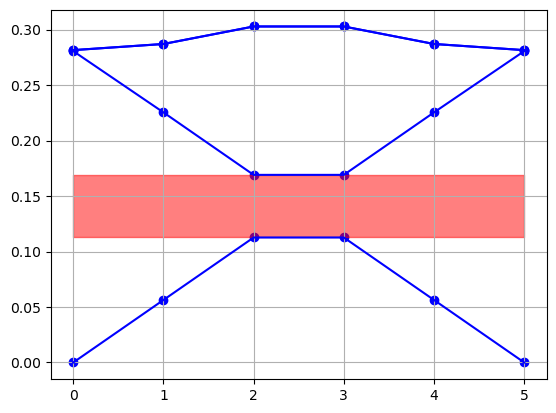

In [16]:
ms = mpb.ModeSolver(
    geometry=geometry1+geometry2,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    num_bands=num_bands,
    resolution=resolution)
ms.run_tm()
tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list

fig, ax = plt.subplots()
x = range(len(tm_freqs))
print(x)
for i,tmz in zip(x, tm_freqs):
    ax.scatter([i]*len(tmz), tmz, color='blue')
ax.plot(tm_freqs, color='blue')
# ax.set_ylim([0, 1])

#plotting gaps 
for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x,gap[1], gap[2], color='red', alpha=0.5)

# points_in_btw = (len(tm_freqs)-4)/3
# points_in_btw = (len(tm_freqs)-3)/2
# tick_l = [i*points_in_btw+i for i in range(len(tm_freqs))]
# # tick_labs = [ 'Γ', 'X', 'M', 'Γ']
# tick_labs = ['Γ', 'X', 'M']
# ax.set_xticks(tick_l)
# ax.set_xticklabels(tick_labs, size = 16)
# ax.set_ylabel('frequancy c/a ', size = 16)
ax.grid(True)
plt.show()